 ## The Ping Model simplified


In [1]:
import matplotlib.pyplot as plt
from brian2 import *
import numpy as np

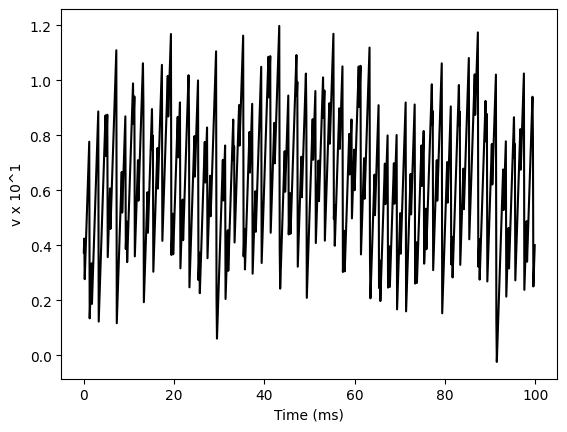

In [31]:

start_scope()

# Set random seed for reproducibility
np.random.seed(42)

tau_e = 10*ms # time constant for excitatory
tau_i = 5*ms
Ve = 10   # memebrane potential for excitatory synapse
Vi = -10   # membrane potential for excitatory synapse
s_e = 5 # total synaptic inputs
s_i = 3 #

##########################################
# rate change of membrane potential
##########################################

# Define equations for the excitatory population
eqs_exc = '''
dv/dt = (-Ve - Vi + s_e) / tau_e : 1
'''

# Define equations for the inhibitory population
eqs_inh = '''
dv/dt = (-Vi - Ve + s_i) / tau_i : 1
'''
##############################################
# Define the ratios
##############################################

# Create neuron groups for excitatory and inhibitory populations
exc = NeuronGroup(100,
                  eqs_exc,
                  threshold='v > 0.8',
                  reset='v = 0.3 + 0.1*randn()',  # Add more randomness to the reset potential
                  refractory=2*ms, #1
                  method='euler')

inh = NeuronGroup(25,
                  eqs_inh,
                  threshold='v > 0.5',
                  reset='v = -0.3 + 0.1*randn()',  # Add more randomness to the reset potential
                  refractory=1*ms,
                  method='euler')

###############################################
# Initialize membrane potential randomly
###############################################
exc.v = 'rand()'
inh.v = 'rand()'


######################################
# Define synaptic connections
######################################
exc_synapse = Synapses(exc, inh, 'w : 1', on_pre='v += w')
exc_synapse.connect(p=0.2)  # Connects each excitatory neuron to 20% of inhibitory neurons
exc_synapse.w = '0.05 + 0.1*rand()'  # Add more randomness to the initial synaptic weights

inh_synapse = Synapses(inh, exc, 'w : 1', on_pre='v -= w')
inh_synapse.connect(p=0.2)  # Connects each inhibitory neuron to 50% of excitatory neurons
inh_synapse.w = '0.05 + 0.2*rand()'  # Add more randomness to the initial synaptic weights

##########################
# Extract series
###########################
statemon_exc = StateMonitor(exc, 'v', record=0) # Voltage
spikemon_exc = SpikeMonitor(exc) #spikes

statemon_inh = StateMonitor(inh, 'v', record=0)
spikemon_inh = SpikeMonitor(inh)

# Run simulation
run(100*ms)

######################
# Plot results
######################
plot(statemon_exc.t/ms, statemon_exc.v[0] , c="black")
xlabel('Time (ms)')
ylabel('v x 10^1')
show()


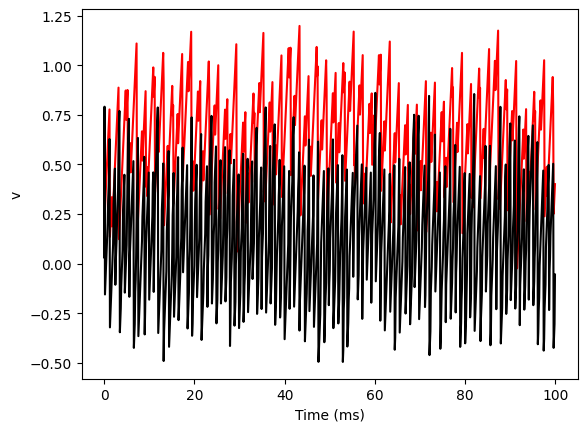

In [32]:
plot(statemon_exc.t/ms, statemon_exc.v[0], c="red")
plot(statemon_exc.t/ms, statemon_inh.v[0], c="black")
xlabel('Time (ms)')
ylabel('v')
show()

Text(0, 0.5, ' Neuron index')

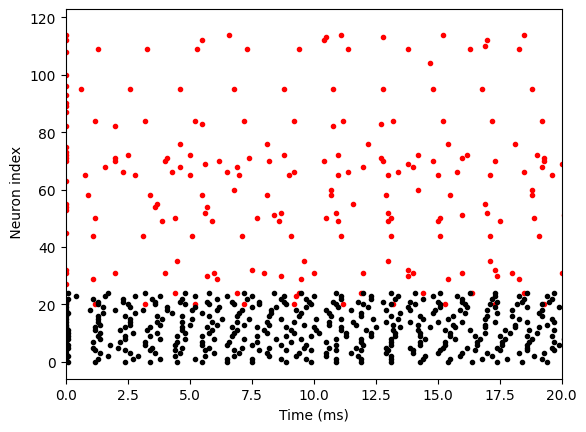

In [33]:
plt.plot(spikemon_exc.t/ms, 20 + spikemon_exc.i, '.r')
plt.plot(spikemon_inh.t/ms, spikemon_inh.i, '.k')
plt.xlim(0,20)
plt.xlabel('Time (ms)')
plt.ylabel(' Neuron index')

Text(0, 0.5, ' Neuron index')

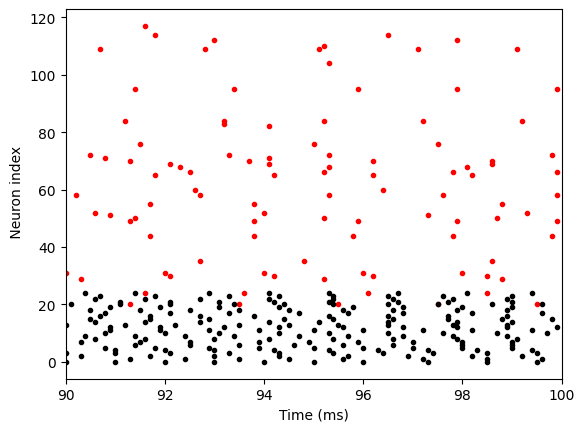

In [34]:
plt.plot(spikemon_exc.t/ms, 20 + spikemon_exc.i, '.r')
plt.plot(spikemon_inh.t/ms, spikemon_inh.i, '.k')
plt.xlim(90,100)
plt.xlabel('Time (ms)')
plt.ylabel(' Neuron index')

In [10]:
import numpy as np

def calculate_plv(signal1, signal2):
    # Compute instantaneous phase for both signals
    phase1 = np.angle(np.fft.fft(signal1))
    phase2 = np.angle(np.fft.fft(signal2))
    
    # Compute phase difference
    phase_diff = phase1 - phase2
    
    # Compute PLV
    plv = np.abs(np.mean(np.exp(1j * phase_diff)))
    
    return plv



# Example usage:
# Generate two example time series (replace these with your actual data)

signal1 = statemon_exc.v[0] #np.sin(np.linspace(0, 10*np.pi, 1000))
signal2 = statemon_inh.v[0] #np.sin(np.linspace(0, 10*np.pi, 1000) + np.pi/1)

# Calculate PLV
plv_values = calculate_plv(signal1, signal2)
print("PLV:", plv_values)

PLV: 0.12829572780111778


PLV: 0.12829572780111778


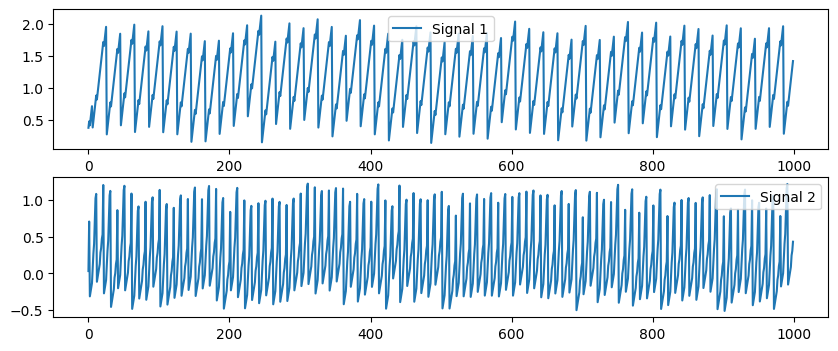

In [22]:
# Calculate PLV
plv_value = calculate_plv(signal1, signal2)
print("PLV:", plv_value)

# Plot signal 1 and signal 2
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(signal1, label='Signal 1')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signal2, label='Signal 2')
plt.legend()
plt.show()